100%|██████████| 170498071/170498071 [03:39<00:00, 777941.54it/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch1/20,Loss:0.9769868614077568
Epoch2/20,Loss:0.949859448492527
Epoch3/20,Loss:0.936108992755413
Epoch4/20,Loss:0.9275527334213257
Epoch5/20,Loss:0.9216130087375641
Epoch6/20,Loss:0.9172080590724945
Epoch7/20,Loss:0.9137948943972588
Epoch8/20,Loss:0.9110668669342995
Epoch9/20,Loss:0.9088378266692162
Epoch10/20,Loss:0.9069843506813049
Epoch11/20,Loss:0.9054241374731063
Epoch12/20,Loss:0.904096942126751
Epoch13/20,Loss:0.9029583237767219
Epoch14/20,Loss:0.9019745785593987
Epoch15/20,Loss:0.9011205441951752
Epoch16/20,Loss:0.9003756111860275
Epoch17/20,Loss:0.899722898721695
Epoch18/20,Loss:0.8991492770910263
Epoch19/20,Loss:0.8986438755989075
Epoch20/20,Loss:0.8981971743702889


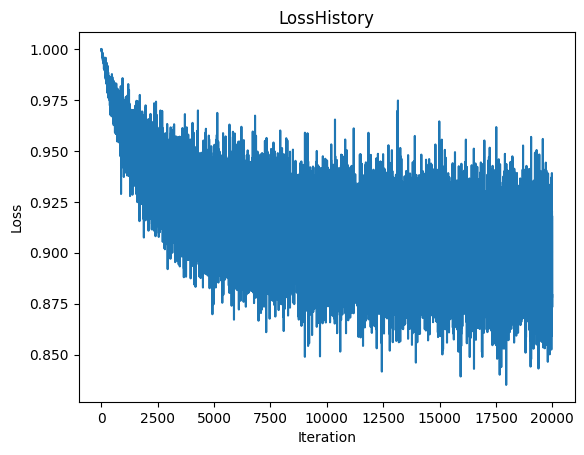

Trainingaccuracy:32.19%
Testaccuracy:32.44%


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
#1.Dataloading
transform=transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
batch_size=50
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,
shuffle=True,num_workers=2)
testset=torchvision.datasets.CIFAR10(root='./data',train=False ,download=True , transform=transform )
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,
shuffle=False,num_workers=2)
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')
#2.Define Network Parameters
Din=3*32*32 # Inputsize(flattenedCIFAR=10imagesize)
K=10 #Outputsize (numberofclassesinCIFAR=10)
std=1e-5
#Initialize weights and biases
w=torch.randn(Din,K)*std #Onelayer:directlymapinputtooutput
b=torch.zeros(K)
#Hyperparameters
iterations=20
lr= 2e-6 #Learningrate
lr_decay=0.9#Learningratedecay
reg=0#Regularization
loss_history=[]
#3.TrainingLoop
for t in range(iterations):
    running_loss=0.0
    for i,data in enumerate(trainloader,0):
        #Getinputsandlabels
        inputs,labels=data
        Ntr=inputs.shape[0]#Batchsize
        x_train=inputs.view(Ntr,-1)#Flatteninputto(Ntr,Din)
        y_train_onehot=nn.functional.one_hot(labels,K).float()#Convertlabelstoone=h
        #Forwardpass
        y_pred=x_train.mm(w)+b#Outputlayeractivation
        #Losscalculation(MeanSquaredErrorwithregularization)
        loss=(1/Ntr)*torch.sum((y_pred-y_train_onehot)**2)+reg*torch.sum(w**2)
        loss_history.append(loss.item())
        running_loss+=loss.item()
        #Backpropagation
        dy_pred=(2.0/Ntr)*(y_pred-y_train_onehot)
        dw=x_train.t().mm(dy_pred)+reg*w
        db=dy_pred.sum(dim=0)
        #Parameterupdate
        w-=lr*dw
        b-=lr*db
        #Printlossforeveryepoch
    if t%1==0:
        print(f"Epoch{t+1}/{iterations},Loss:{running_loss/len(trainloader)}")
    #Learningratedecay
    lr*=lr_decay
#4.PlottingtheLossHistory
plt.plot(loss_history)
plt.title("LossHistory")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()
#5.CalculateAccuracyonTrainingSet
correct_train=0
total_train=0
with torch.no_grad():
    for data in trainloader:
        inputs,labels=data
        Ntr=inputs.shape[0]
        x_train=inputs.view(Ntr,-1)
        y_train_onehot=nn.functional.one_hot(labels,K).float()
        #Forwardpass
        y_train_pred=x_train.mm(w)+b
        predicted_train=torch.argmax(y_train_pred,dim=1)
        total_train+=labels.size(0)
        correct_train+=(predicted_train==labels).sum().item()
train_acc=100*correct_train/total_train
print(f"Trainingaccuracy:{train_acc:.2f}%")
#6.CalculateAccuracyonTestSet
correct_test=0
total_test=0
with torch.no_grad():
    for data in testloader:
        inputs,labels=data
        Nte=inputs.shape[0]
        x_test=inputs.view(Nte,-1)
        y_test_onehot=nn.functional.one_hot(labels,K).float()
        #Forwardpass
        y_test_pred=x_test.mm(w)+b
        predicted_test=torch.argmax(y_test_pred,dim=1)
        total_test+=labels.size(0)
        correct_test+=(predicted_test==labels).sum().item()
test_acc=100*correct_test/total_test
print(f"Testaccuracy:{test_acc:.2f}%")